# Exercício 19
Análise de Pinguins e História dos Oceanos Dataset do Kaggle: Palmer's Penguins </br>
https://www.kaggle.com/datasets/samybaladram/palmer s-penguin-dataset-extended </br>
O dataset de Palmer's Penguins contém informações sobre três espécies de pinguins, suas características físicas e o ambiente onde vivem. Imagine que você está trabalhando para um documentário sobre as mudanças climáticas e deseja usar os dados dos pinguins para contar uma história visual sobre como essas mudanças estão afetando essas aves marinhas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

penguins_df = pd.read_csv('../palmerpenguins_extended.csv')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021
...,...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,6447.0,male,squid,adult,healthy,2025
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,male,squid,adult,healthy,2025
3427,Gentoo,Biscoe,51.4,20.4,258.0,7409.0,male,squid,adult,overweight,2025
3428,Gentoo,Biscoe,55.9,20.5,247.0,6491.0,male,squid,adult,healthy,2025


# Análise de Pinguins e História dos Oceanos
### Tarefas
#### • Existem valores ausentes ou inconsistentes no dataset? Se sim, como você trataria esses dados para garantir a qualidade da análise?

In [9]:
penguins_df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
year                 0
dtype: int64

#### Não existem valores ausentes e inconsistentes. Porém existem outliers que, dependendo da análise feita em cima de médias dos valores dos pinguins, podem se sobressair em certos gráficos onde esses valores podem comprometer a média.

### - Realize uma análise exploratória dos dados para entender as características físicas (como peso, comprimento do bico e comprimento da asa) das três espécies de pinguins. Utilize agregações e agrupamentos para comparar essas características entre as espécies.

In [44]:
df_agg = penguins_df.groupby('species').agg({
    'body_mass_g': 'mean',
    'bill_length_mm': 'mean',
    'flipper_length_mm': 'mean'
}).reset_index()

df_agg

,species,body_mass_g,bill_length_mm,flipper_length_mm
0,Adelie,4445.475641,35.431603,200.759615
1,Chinstrap,4602.531300,35.014607,201.675762
2,Gentoo,5437.640738,44.161909,217.546111


### No gráfico abaixo podemos notar que, mesmo sendo a espécie com a maior média de peso em gramas, o Gentoo perde para a Chinstrap em questáo de quantidade de pinguins mais pesados que sua própria média. Os Chinstrap possui a média de 4602.5 gramas de peso, e mesmo assim a maior parte dos valores de peso passam a média e se destacam no gráfico.

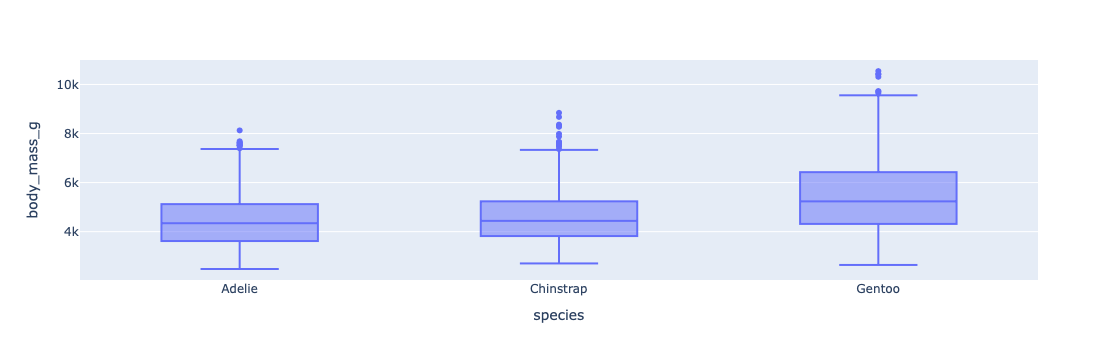

In [48]:
px.box(penguins_df, x='species', y='body_mass_g')

### E até se compararmos os dados da largura em milímetros dos bicos dos pinguins, notamos que não é só apenas no peso corporal que os Chinstrap se destacam de sua própria média, por mais que nos bicos, ainda existem certos pinguins da espécie Adelie que estão acima de alguns outliers dos Chinstrap.

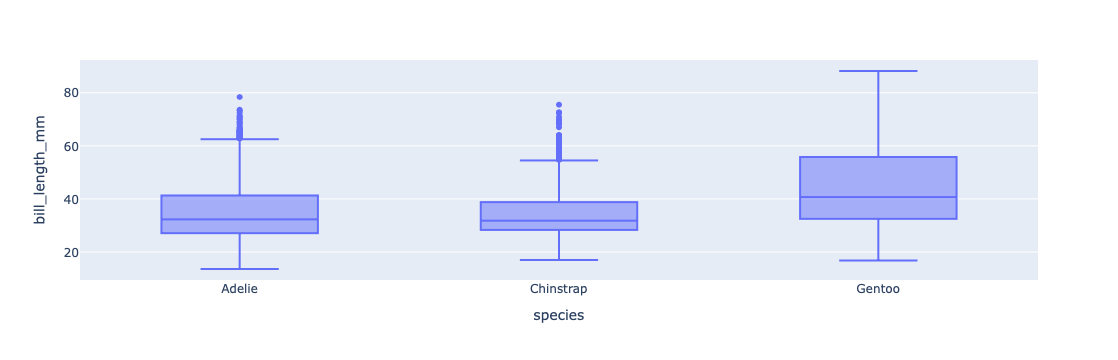

In [47]:
px.box(penguins_df, x='species', y='bill_length_mm')

### Notamos esse mesmo comportamento em  

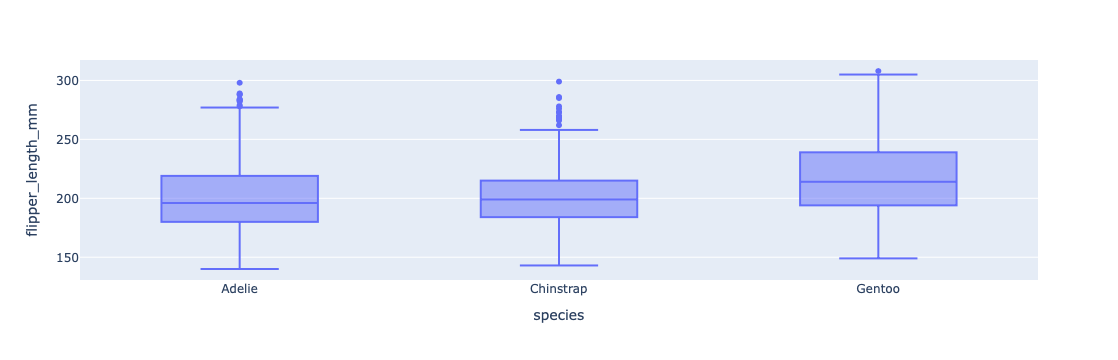

In [24]:
px.box(penguins_df, x='species', y='flipper_length_mm')